In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_diabetes

In [7]:
df=pd.read_csv('diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.shape

(768, 9)

In [13]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test_scaled)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [26]:
print(f"\nAccuracy: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.72

Confusion Matrix:
 [[77 22]
 [21 34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [28]:
sample_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])  # Example input
sample_data_scaled = scaler.transform(sample_data)  # Scale the input
sample_prediction = model.predict(sample_data_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
print("\nPrediction for sample data:", "Diabetic" if sample_prediction[0] == 1 else "Non-Diabetic")


Prediction for sample data: Diabetic


In [30]:
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [31]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

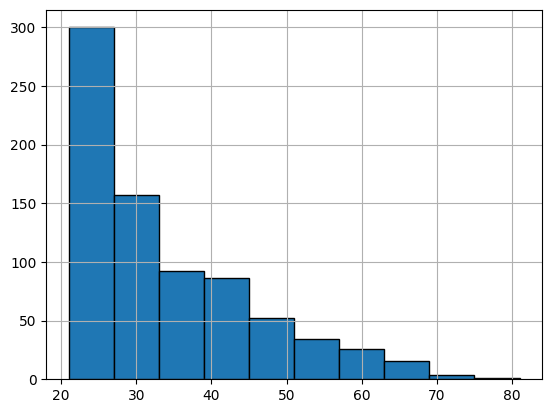

In [32]:
df["Age"].hist(edgecolor = "black");

In [33]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


/var/folders/t1/2qjgvqr17479p2c12zg26rww0000gn/T/ipykernel_1334/3357826716.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age, bins = 20, ax=ax[0,0])
/var/folders/t1/2qjgvqr17479p2c12zg26rww0000gn/T/ipykernel_1334/3357826716.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnanc

<Axes: xlabel='BMI', ylabel='Density'>

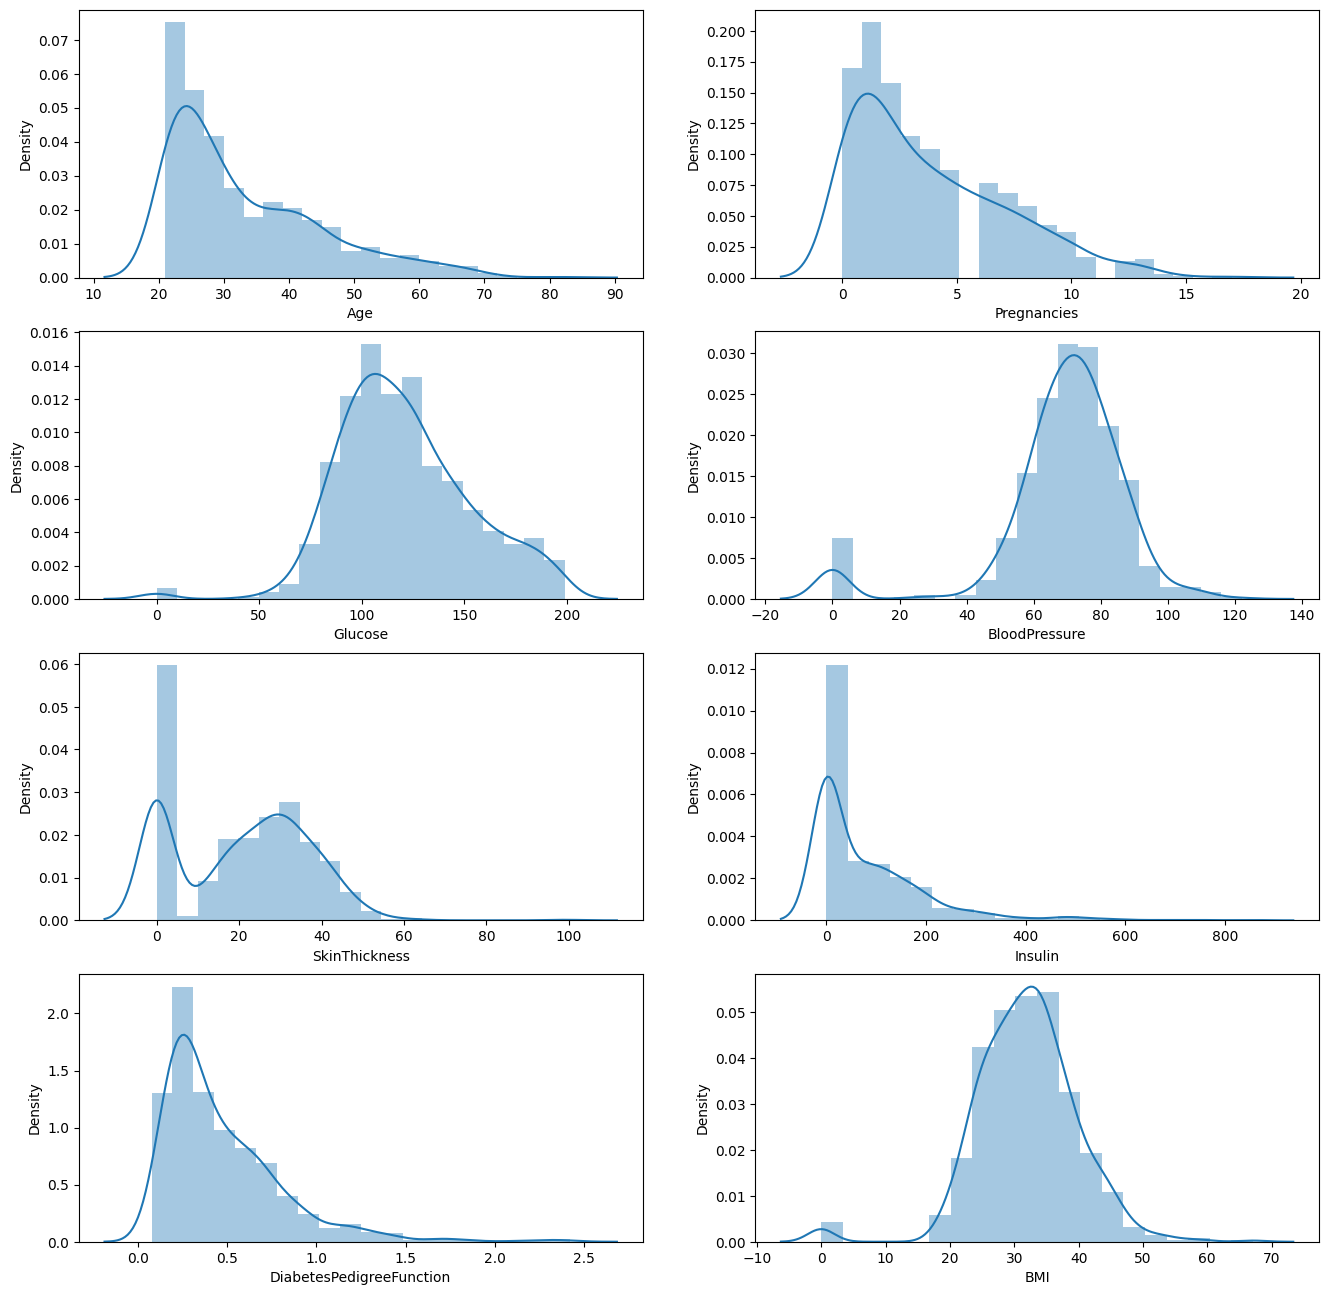

In [34]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

In [35]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [36]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [37]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [39]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [40]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [41]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [42]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [43]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


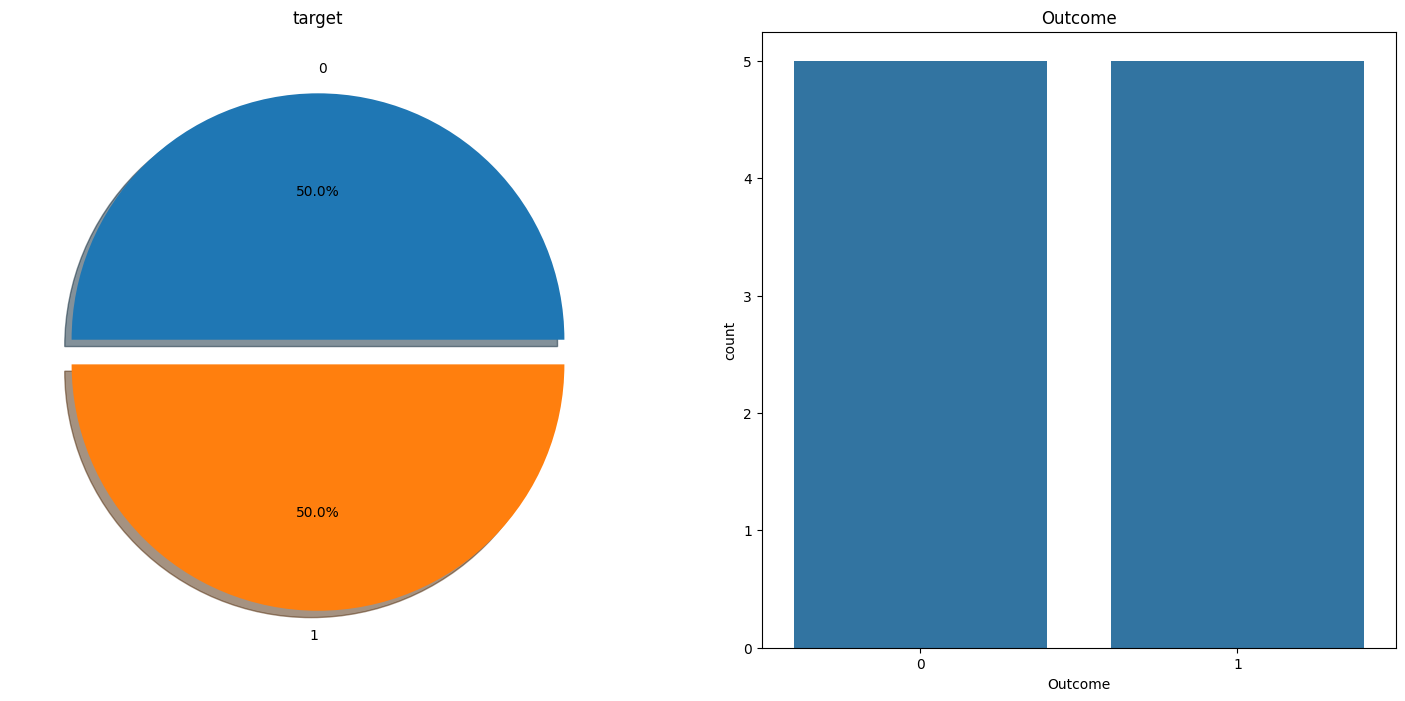

In [65]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])

ax[1].set_title('Outcome')
plt.show()

In [70]:
df.corr()

,Outcome
Outcome,1.0


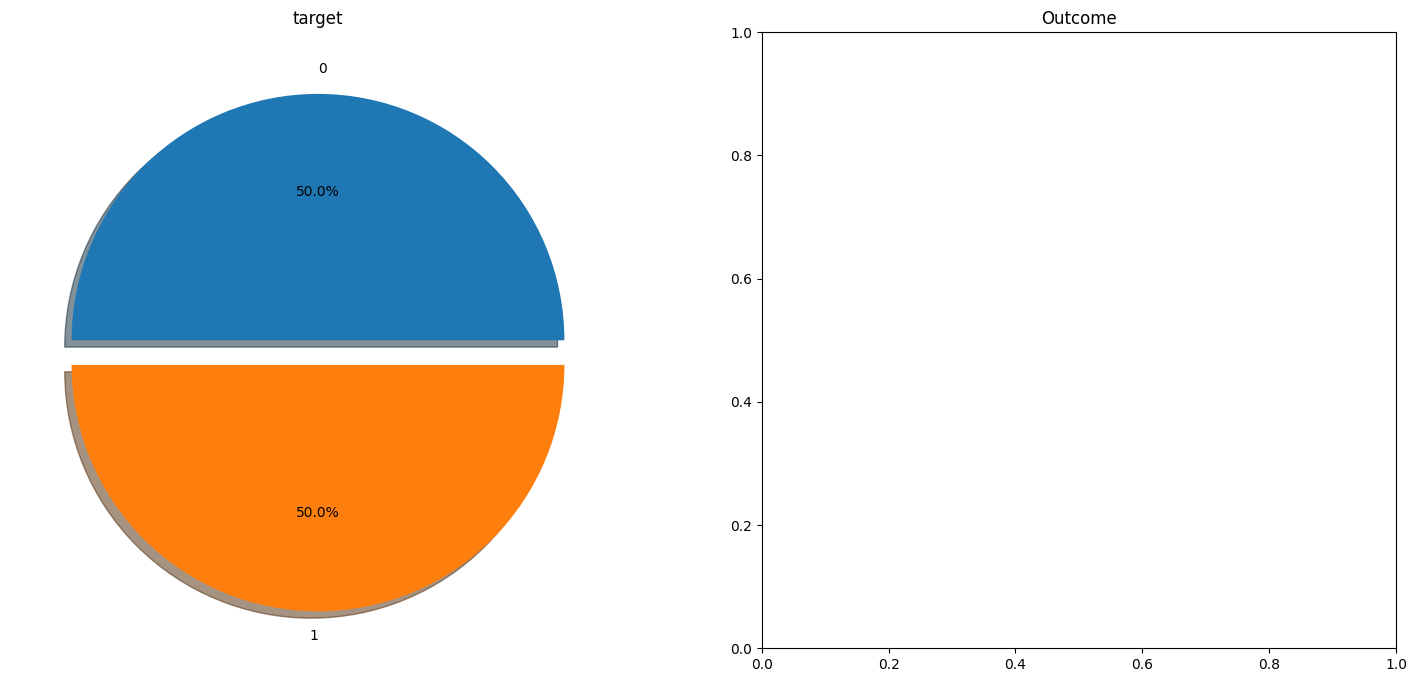

In [68]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
ax[1].set_title('Outcome')
plt.show()

In [69]:
df.corr()

,Outcome
Outcome,1.0


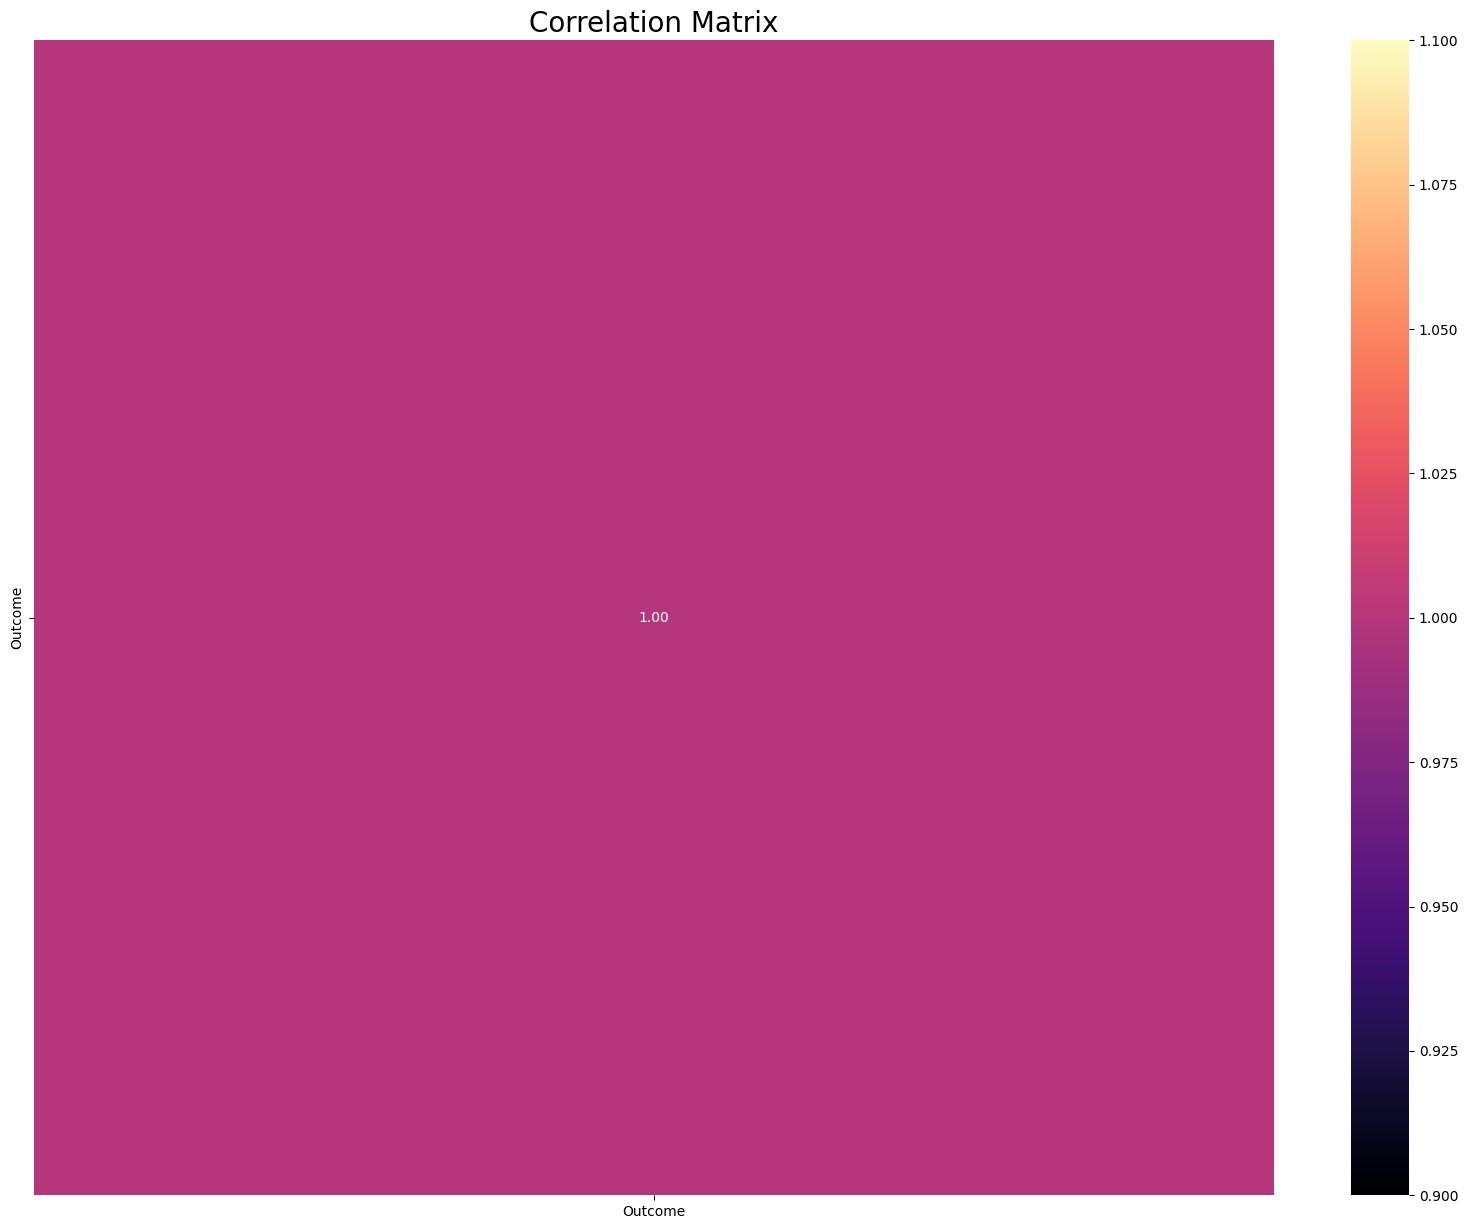

In [71]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(random_state=16)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(y_test, y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[78 21]
 [18 37]]
Accuracy by confusion matrix: 0.7467532467532467


                  precision    recall  f1-score   support

without diabetes       0.81      0.79      0.80        99
   with diabetes       0.64      0.67      0.65        55

        accuracy                           0.75       154
       macro avg       0.73      0.73      0.73       154
    weighted avg       0.75      0.75      0.75       154

----------------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(y_test, y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[78 21]
 [18 37]]
Accuracy by confusion matrix: 0.7467532467532467


                  precision    recall  f1-score   support

without diabetes       0.81      0.79      0.80        99
   with diabetes       0.64      0.67      0.65        55

        accuracy                           0.75       154
       macro avg       0.73      0.73      0.73       154
    weighted avg       0.75      0.75      0.75       154

----------------------------------------------------------------------


In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(y_test, y_pred, target_names=target_names))
print("-"*70)

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[65 34]
 [20 35]]
Accuracy by confusion matrix: 0.6493506493506493


                  precision    recall  f1-score   support

without diabetes       0.76      0.66      0.71        99
   with diabetes       0.51      0.64      0.56        55

        accuracy                           0.65       154
       macro avg       0.64      0.65      0.64       154
    weighted avg       0.67      0.65      0.66       154

----------------------------------------------------------------------


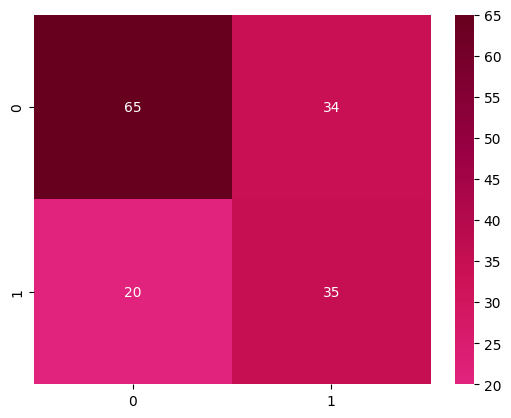

In [83]:
dataplot = sns.heatmap(confusion_matrix, cmap='PuRd', annot=True, center=0)

In [91]:
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces from column namesplt.figure(figsize=(8, 5))

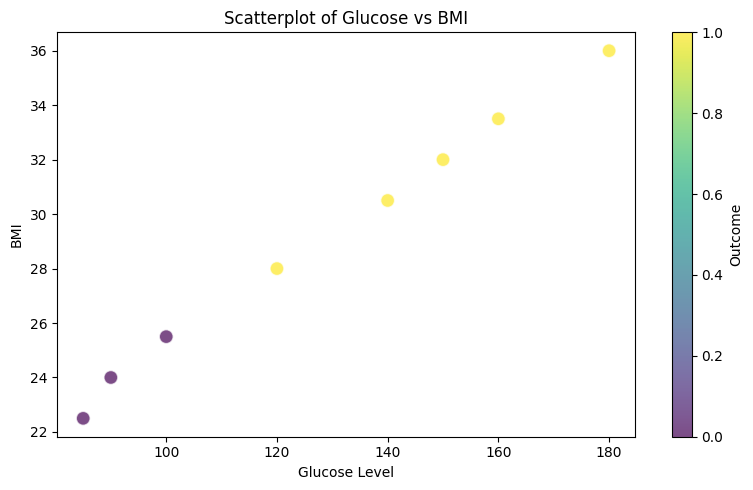

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (if you don't have it defined)
data = {
    'Glucose': [85, 90, 100, 120, 140, 150, 160, 180],
    'BMI': [22.5, 24.0, 25.5, 28.0, 30.5, 32.0, 33.5, 36.0],
    'Outcome': [0, 0, 0, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Manually using Matplotlib's scatter function
plt.figure(figsize=(8, 5))
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='viridis', s=100, edgecolors='w', alpha=0.7)

# Add title and labels
plt.title('Scatterplot of Glucose vs BMI')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')

# Show color scale (color bar) to represent 'Outcome'
plt.colorbar(label='Outcome')

# Display the plot
plt.show()
